# EDA 
## Case Study: Covid19 Data Analysis

In [143]:
# import the libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# import the dataset

dataset=pd.read_csv("covid19_Confirmed_dataset.csv")
dataset.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [5]:
dataset.shape

(266, 104)

In [6]:
#delete the useless colulmn

df= dataset.drop(["Lat","Long"], axis=1, inplace= True)

In [7]:
# aggregate the rows by the country

corona_dataset_aggregated=dataset.groupby("Country/Region").sum()

In [8]:
dataset.head()

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [9]:
corona_dataset_aggregated.head()

,Province/State,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
Albania,0,0,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
Algeria,0,0,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
Andorra,0,0,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
Angola,0,0,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [10]:
del corona_dataset_aggregated["Province/State"]


In [11]:
corona_dataset_aggregated.shape

(187, 100)

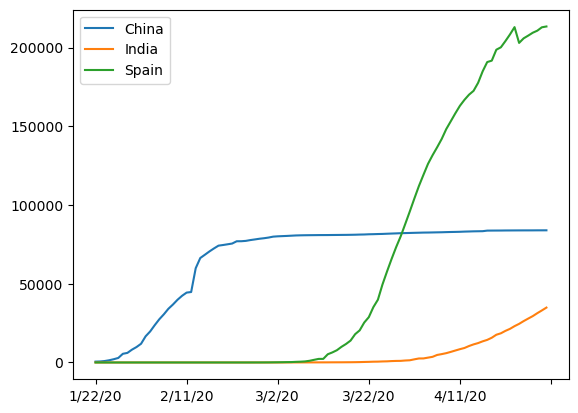

In [12]:
#visualise the data related to the country

corona_dataset_aggregated.loc["China"].plot()
corona_dataset_aggregated.loc["India"].plot()
corona_dataset_aggregated.loc["Spain"].plot()
plt.legend()



<Axes: >

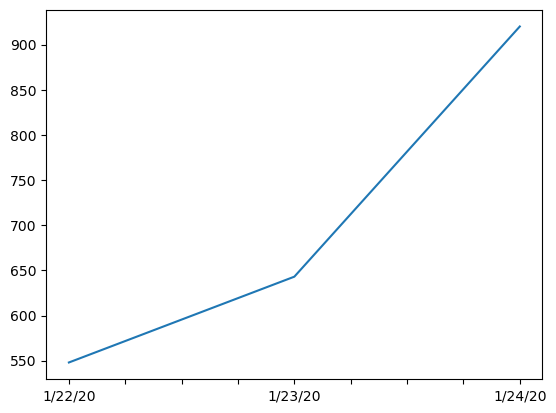

In [13]:
#calculate the good measure
corona_dataset_aggregated.loc["China"][:3].plot()

<Axes: >

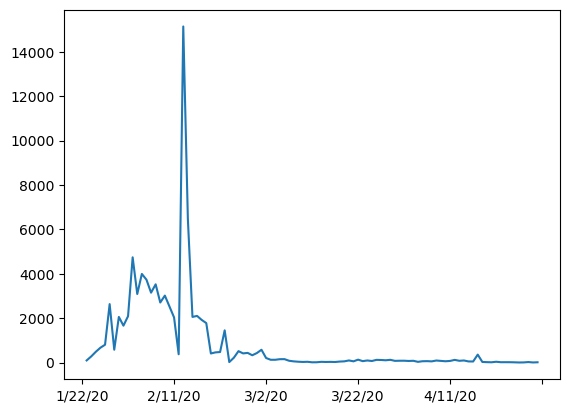

In [14]:
# calculate the first derivative of the curve
corona_dataset_aggregated.loc["China"].diff().plot()


In [15]:
# maximum infection rate
corona_dataset_aggregated.loc["China"].diff().max()


15136.0

In [16]:
corona_dataset_aggregated.loc["India"].diff().max()


1893.0

In [17]:
corona_dataset_aggregated.loc["Spain"].diff().max()

9630.0

In [18]:
countries=list(corona_dataset_aggregated.index)
max_infection_rates=[]

for c in countries:
    max_infection_rates.append(corona_dataset_aggregated.loc[c].diff().max())

corona_dataset_aggregated["Max_infection_rates"]=max_infection_rates


In [19]:
corona_dataset_aggregated

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,Max_infection_rates
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1176,1279,1351,1463,1531,1703,1828,1939,2171,232.0
Albania,0,0,0,0,0,0,0,0,0,0,...,634,663,678,712,726,736,750,766,773,34.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,2910,3007,3127,3256,3382,3517,3649,3848,4006,199.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,723,723,731,738,738,743,743,743,745,43.0
Angola,0,0,0,0,0,0,0,0,0,0,...,25,25,25,25,26,27,27,27,27,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,474,480,484,342,342,342,343,344,344,66.0
Western Sahara,0,0,0,0,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,4.0
Yemen,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,6,6,5.0


In [20]:
# create a new dataframe

corona_data=pd.DataFrame(corona_dataset_aggregated["Max_infection_rates"])

In [21]:
corona_data

,Max_infection_rates
Country/Region,
Afghanistan,232.0
Albania,34.0
Algeria,199.0
Andorra,43.0
Angola,5.0
...,...
West Bank and Gaza,66.0
Western Sahara,4.0
Yemen,5.0


In [22]:
#importing the dataset 2

happiness_report=pd.read_csv("worldwide_happiness_report.csv")

In [23]:
happiness_report.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [24]:
happiness_report.shape


(156, 9)

In [25]:
# drop the useless column

useless_cols=["Overall rank","Score","Generosity","Perceptions of corruption"]

In [26]:
happiness_report.drop(useless_cols, axis=1, inplace=True)
happiness_report.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,Finland,1.340,1.587,0.986,0.596
1,Denmark,1.383,1.573,0.996,0.592
2,Norway,1.488,1.582,1.028,0.603
3,Iceland,1.380,1.624,1.026,0.591
4,Netherlands,1.396,1.522,0.999,0.557


In [72]:
# join the dataset

corona_data.head()

,Max_infection_rates
Country/Region,
Afghanistan,232.0
Albania,34.0
Algeria,199.0
Andorra,43.0
Angola,5.0


In [70]:
happiness_report.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,Finland,1.340,1.587,0.986,0.596
1,Denmark,1.383,1.573,0.996,0.592
2,Norway,1.488,1.582,1.028,0.603
3,Iceland,1.380,1.624,1.026,0.591
4,Netherlands,1.396,1.522,0.999,0.557


In [74]:
data=corona_data.join(happiness_report,how = "inner")
data.head()

# not working 

,Max_infection_rates,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices


In [78]:
data = corona_data.merge(
    happiness_report,
    left_index=True,      # Country/Region is index in corona_data
    right_on="Country or region",  # column in happiness_report
    how="inner"
)


In [82]:
data.head()

,Max_infection_rates,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
153,232.0,Afghanistan,0.350,0.517,0.361,0.000
106,34.0,Albania,0.947,0.848,0.874,0.383
87,199.0,Algeria,1.002,1.160,0.785,0.086
46,291.0,Argentina,1.092,1.432,0.881,0.471
115,134.0,Armenia,0.850,1.055,0.815,0.283


In [86]:
data_numeric = data.select_dtypes(include=['float64', 'int64'])
data_numeric.corr()


,Max_infection_rates,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Max_infection_rates,1.000000,0.250118,0.191958,0.289263,0.078196
GDP per capita,0.250118,1.000000,0.759468,0.863062,0.394603
Social support,0.191958,0.759468,1.000000,0.765286,0.456246
Healthy life expectancy,0.289263,0.863062,0.765286,1.000000,0.427892
Freedom to make life choices,0.078196,0.394603,0.456246,0.427892,1.000000


In [88]:
data

,Max_infection_rates,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
153,232.0,Afghanistan,0.350,0.517,0.361,0.000
106,34.0,Albania,0.947,0.848,0.874,0.383
87,199.0,Algeria,1.002,1.160,0.785,0.086
46,291.0,Argentina,1.092,1.432,0.881,0.471
115,134.0,Armenia,0.850,1.055,0.815,0.283
...,...,...,...,...,...,...
107,29.0,Venezuela,0.960,1.427,0.805,0.154
93,19.0,Vietnam,0.741,1.346,0.851,0.543
150,5.0,Yemen,0.287,1.163,0.463,0.143
137,9.0,Zambia,0.578,1.058,0.426,0.431


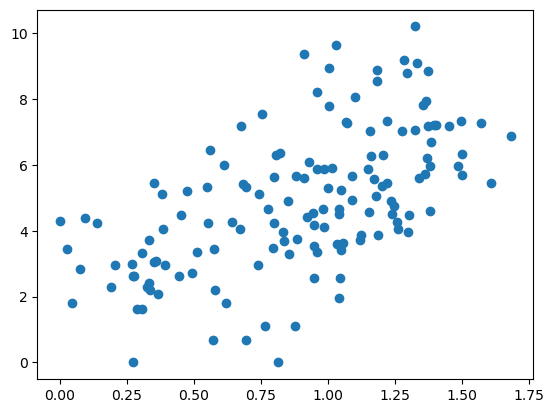

In [122]:
# visualization

x=data["GDP per capita"]
y=data["Max_infection_rates"]
plt.scatter(x,np.log(y))   # logical ing
plt.show() 

<Axes: xlabel='GDP per capita', ylabel='Max_infection_rates'>

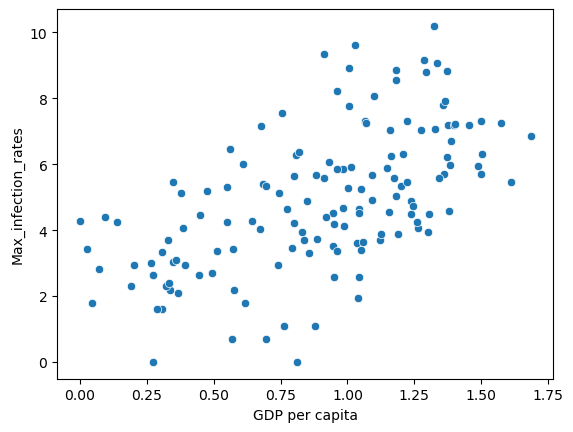

In [118]:
sns.scatterplot(x="GDP per capita",
                y=np.log(data["Max_infection_rates"]), 
                data=data)

<Axes: xlabel='Social support', ylabel='Max_infection_rates'>

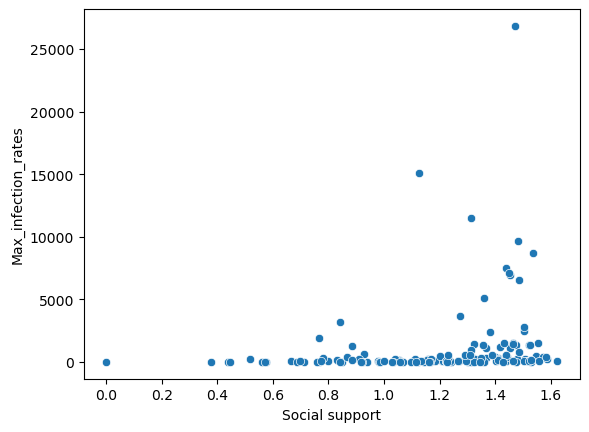

In [116]:
sns.scatterplot(x="Social support",
                y="Max_infection_rates", 
                data=data)

<Axes: xlabel='Healthy life expectancy', ylabel='Max_infection_rates'>

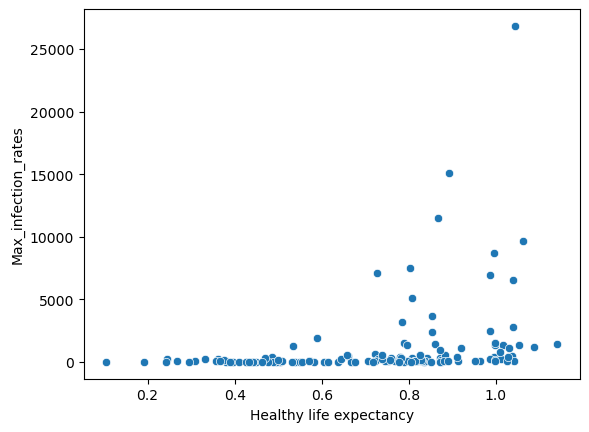

In [133]:
sns.scatterplot(x="Healthy life expectancy",
                y="Max_infection_rates", 
                data=data)

<Axes: xlabel='Healthy life expectancy', ylabel='Max_infection_rates'>

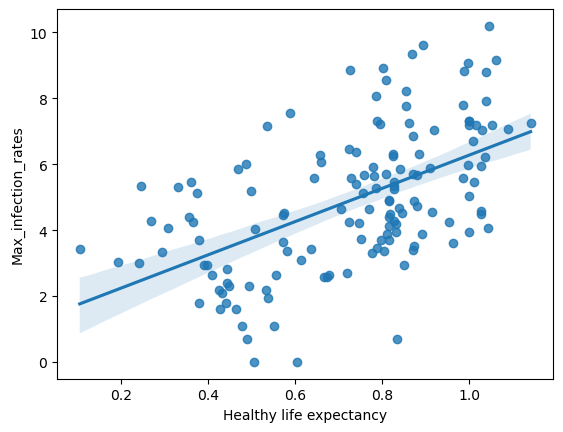

In [147]:
x=data["Healthy life expectancy"]
y=data["Max_infection_rates"]
sns.regplot(x=x, y=np.log(y))

In [ ]:
x=data["Freedom to make life choices"]
y=data["Max_infection_rates"]
sns.regplot(x=x, y=np.log(y))